![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## DATA ANALYSIS PREMIER LEAGUE 2018

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.DataFrame()
soccer = pd.read_csv("soccer18-19.csv")


In [9]:
print(soccer.shape)


(380, 23)


In [ ]:
soccer.head(10)

In [ ]:
soccer.info()

In [ ]:
soccer.describe()

In [ ]:
soccer['AwayTeam'].value_counts()


In [ ]:
soccer['HomeTeam'].value_counts() 

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## FOUL ANALYSIS

-> Which team committed the most fouls?

-> Which Home Team committed  the most fouls?

-> Which Away Team committed the most fouls?

-> Which team committed the least fouls?

In [ ]:
total_fouls_home = soccer['HF'].sum()
print(total_fouls_home)

In [ ]:
hfouls = soccer[['HF','HomeTeam']]
thfouls = hfouls.groupby('HomeTeam',as_index=False)['HF'].sum().sort_values(by ='HF' ,ascending=False)
print(thfouls)



There was a total of 3858 fouls committed by Home Teams .

Brighton and Watford were the home teams to commit the most fouls with 221 Fouls committed at home


In [ ]:
thfouls.plot(kind='bar',xlabel='HomeTeams' , ylabel='Fouls committed by HomeTeam',figsize=(15,5))

In [ ]:
aFouls = soccer[['AF','AwayTeam']]
total_afouls = aFouls.groupby('AwayTeam', as_index=False)["AF"].sum().sort_values(by = 'AF',ascending=False )
print(total_afouls)

Brighton commited the most fouls as an away team with 242 Fouls.

In [ ]:
df3 = pd.DataFrame(thfouls)
df3.rename(columns={'HomeTeam':'Team'},inplace=True)
print(df3)
df4 = pd.DataFrame(total_afouls)
df4.rename(columns={'AwayTeam':'Team'},inplace=True)
print(df4)

In [ ]:
#print(df([thfouls],[total_afouls],columns=['Team ' ,'Fi']))
merged_fouls = pd.merge(left= df3 ,right= df4 , on='Team' ,how='right')
print(merged_fouls)

In [ ]:
merged_fouls['Total Fouls'] = merged_fouls['AF'] + merged_fouls['HF']

print(merged_fouls.sort_values(by = 'Total Fouls' ,ascending=False))


In [ ]:
fig, ax = plt.subplots(figsize =(26, 10))

#barsFouls = ax.barh(y = merged_fouls['Team'], width =merged_fouls['Total Fouls'],linewidth = 0 , )
#barsFouls[0].set_color('r')
#barsFouls[2].set_color('r')
#barsFouls[5].set_color('r')

barF= ax.bar(x = merged_fouls['Team'], height =merged_fouls['Total Fouls'],linewidth = 0 , )
plt.rcParams['font.size'] = 10
ax.tick_params(axis='x', rotation=90)

barF[0].set_color('r')
barF[2].set_color('r')
barF[5].set_color('r')

plt.show()


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## DRAW PERCENTAGE ANALYSIS

In [ ]:
draws = soccer[['HTR','FTR','AwayTeam' , 'HomeTeam']]
#print(Ht_draws)

draw_both_halves= draws.loc[(draws['FTR'] == 'D') & (draws['HTR'] == 'D')]
print(draw_both_halves)
draw_both_halves.describe()
draw_both_halves.shape

#Ht_draws.loc[soccer['HTR'] == 'D',soccer['FTR'] == 'D']

---
DRAWS AT HALF TIME & FT

-- 42 matches ended in draws at HT and FT

In [ ]:
draw_FT  =  draws.loc[(draws['FTR'] == 'D')]
print(draw_FT)

---
TOTAL DRAWS AT FULL TIME

There were a total 71 matches that ended at FT being Draws
This implies there were 31 matches that were being won at HT but still ended in Draws.


DRAW PERCENTAGE ANALYSIS

Out of 380 matches , 71 ended in Draws.

This implies an **18.68%** for matches to end in draws

## CARD ANALYSIS

## YELLOW CARDS  ANALYSIS

Average number of yellow cards for every match is **3** (3.210)

The average number of yellow cards for the Away Team is **1.68** (1.68 -> 2)

The average number of yellow cards for the Home Team is **1.53** (1.52 -> 2)

-------
INSIGHT

It is expected that there will be at least 2 yellow cards shown each game

In [315]:
yellow_cards = soccer[['HomeTeam','AwayTeam','HY','AY']]
yellow_cards['Total_yCards'] = yellow_cards['HY'] + yellow_cards['AY']
#print(yellow_cards)
#yellow_cards['Total_yCards'].mean()
#yellow_cards['AY'].mean()
yellow_cards['HY'].mean()

C:\Users\Benjamin Appiah-Boad\AppData\Local\Temp\ipykernel_7876\588524456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow_cards['Total_yCards'] = yellow_cards['HY'] + yellow_cards['AY']


1.5263157894736843

## RED CARD ANALYSIS

In [13]:
red_cards = soccer[['HomeTeam','AwayTeam','HR','AR','FTR']]
red_cards['total_rCards'] = red_cards['HR'] + red_cards['AR']


home_red = red_cards.groupby(by=['HomeTeam','FTR'],as_index=False)['HR'].sum()

home_red_not_null = home_red.loc[(home_red['HR'] > 0) ]
print(home_red_not_null)
#print(home_red)



          HomeTeam FTR  HR
4      Bournemouth   D   1
6         Brighton   A   1
8         Brighton   H   1
18  Crystal Palace   A   1
24          Fulham   A   1
27    Huddersfield   A   2
28    Huddersfield   D   1
30       Leicester   A   1
32       Leicester   H   1
34       Liverpool   H   1
39      Man United   H   1
40       Newcastle   A   1
43     Southampton   A   2
49         Watford   A   3


C:\Users\Benjamin Appiah-Boad\AppData\Local\Temp\ipykernel_17932\3827445954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_cards['total_rCards'] = red_cards['HR'] + red_cards['AR']


In [382]:
#soccer.loc[(soccer['HomeTeam']=='Brighton') & (soccer['HR'] == 1) & (soccer['FTR'] == 'H') ]
#soccer.loc[(soccer['HomeTeam']=='Leicester') & (soccer['HR'] == 1) & (soccer['FTR'] == 'H')]
#soccer.loc[(soccer['HomeTeam']=='Liverpool') & (soccer['HR'] == 1) & (soccer['FTR'] == 'H')]
#soccer.loc[(soccer['HomeTeam']=='Man United') & (soccer['HR'] == 1) & (soccer['FTR'] == 'H')]


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
198,E0,30/12/2018,Man United,Bournemouth,4,1,H,3,1,H,...,8,3,10,7,4,5,2,0,1,0


A home team received a Red card on 14 occassios
Only **4** home teams were to win their matches after getting a  red card.


Details of the 4 games can be run above

In [8]:
away_red = red_cards.groupby(by=['AwayTeam','FTR'],as_index=False)['AR'].sum()

away_red_not_null = away_red.loc[(away_red['AR'] > 0) & (away_red['FTR'] == 'D')]
print(away_red_not_null)
#print(home_red)


          AwayTeam FTR  AR
1          Arsenal   D   1
19  Crystal Palace   D   1
22         Everton   D   2
31       Leicester   D   1
43       Newcastle   D   1
54        West Ham   D   1


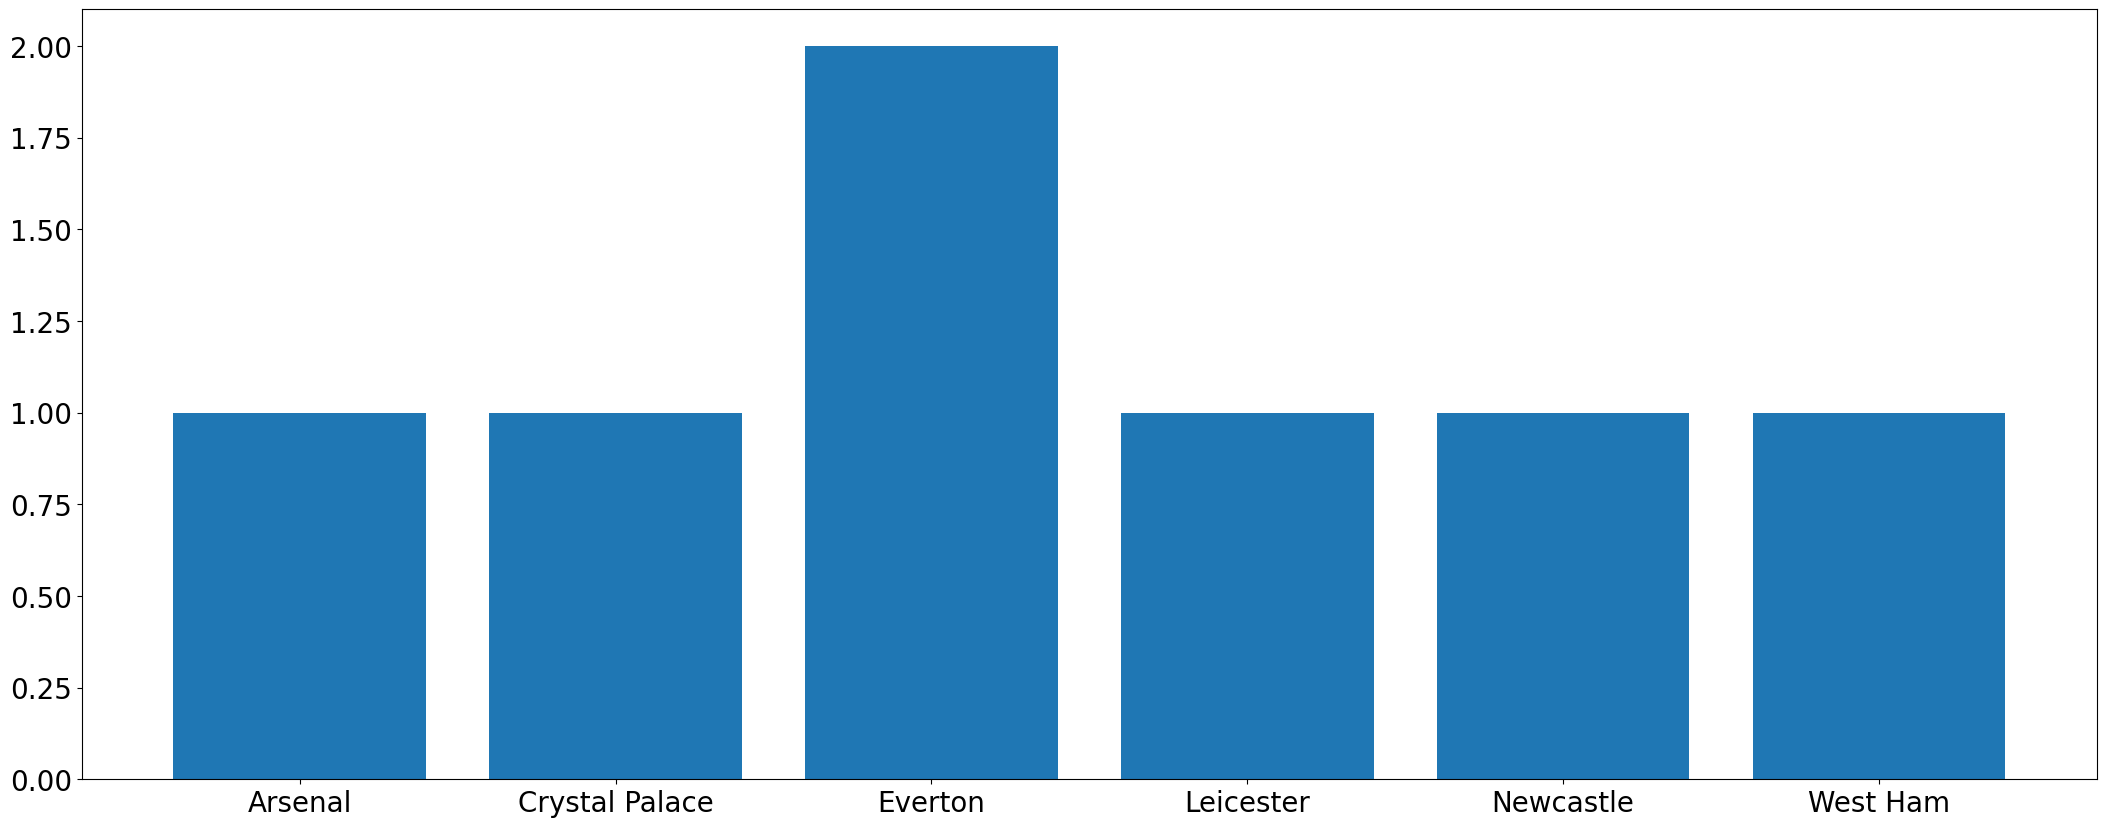

In [419]:

fig, ax = plt.subplots(figsize =(26, 10))

#barsFouls = ax.barh(y = merged_fouls['Team'], width =merged_fouls['Total Fouls'],linewidth = 0 , )
#barsFouls[0].set_color('r')
#barsFouls[2].set_color('r')
#barsFouls[5].set_color('r')
barRedCardsDraws= ax.bar(x = away_red_not_null['AwayTeam'], height = away_red_not_null['AR'],linewidth = 0 , )
plt.rcParams['font.size'] = 10

ValueError: x and y must have same first dimension, but have shapes (14,) and (6,)

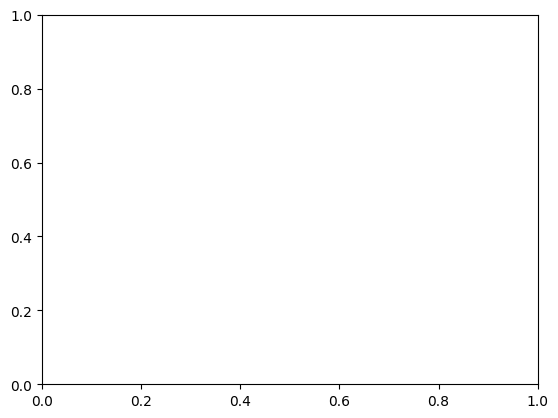

In [12]:
plt.plot(home_red_not_null['HR'], away_red_not_null['AR'])
plt.show()

---
__*INSIGHT AWAY TEAM RED CARDS*__ 
____________
An away team received a red card on __24__ occasions.

The Away Team were able to win the match on __6__ of the 24 occasions.

The match ended in a Draw on **6** other occasions.

The Away Team lost the remaining __12__ .

In [ ]:
soccer.loc[(soccer['AwayTeam'] == 'Tottenham') & (soccer['AR'] > 0) ]

Home Team chances of winning a match when the AwayTeam gets a red card is 50%
Then a 25% draw amd 25% win for the away team
